# BLACK FRIDAY DATASET WORKOUT

Description:
The dataset here is a sample of the transactions made in a retail store. The store wants to know better the customer purchase behaviour against different products. Specifically, here the problem is a regression problem where we are trying to predict the dependent variable (the amount of purchase) with the help of the information contained in the other variables.


In [1]:
# Importing the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Importing the dataset
df = pd.read_csv('BlackFriday.csv')

In [2]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [3]:
# Replacing NaN from columns "Product_Category_2" and "Product_Category_3"
df['Product_Category_2'].fillna(0, inplace=True)
df['Product_Category_3'].fillna(0, inplace=True)

In [4]:
# Dropping the fields 'User_ID' and 'Product_ID'
df.drop(['User_ID', 'Product_ID'], axis=1, inplace=True)
df.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,F,0-17,10,A,2,0,3,0.0,0.0,8370
1,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,F,0-17,10,A,2,0,12,0.0,0.0,1422
3,F,0-17,10,A,2,0,12,14.0,0.0,1057
4,M,55+,16,C,4+,0,8,0.0,0.0,7969


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 10 columns):
Gender                        537577 non-null object
Age                           537577 non-null object
Occupation                    537577 non-null int64
City_Category                 537577 non-null object
Stay_In_Current_City_Years    537577 non-null object
Marital_Status                537577 non-null int64
Product_Category_1            537577 non-null int64
Product_Category_2            537577 non-null float64
Product_Category_3            537577 non-null float64
Purchase                      537577 non-null int64
dtypes: float64(2), int64(4), object(4)
memory usage: 41.0+ MB


Text(0.5, 1.0, 'Marital status deployment')

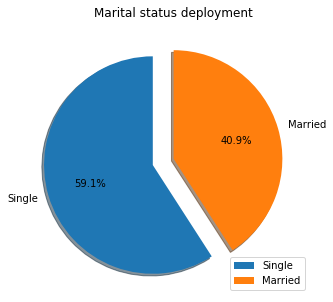

In [6]:
# Marital deployment
fig1, ax1 = plt.subplots(figsize=(10,5))
ax1.pie(df['Marital_Status'].value_counts(), explode = (0.2,0), labels=['Single', 'Married'], autopct='%1.1f%%',
        shadow=True, startangle=90)
plt.legend()
plt.title('Marital status deployment')

Text(0.5, 1.0, 'Gender deployment')

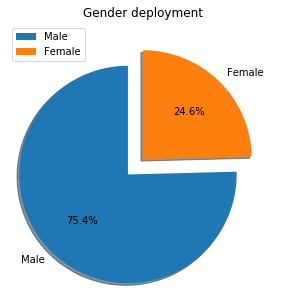

In [7]:
# Gender status deployment
fig1, ax1 = plt.subplots(figsize=(10,5))
ax1.pie(df['Gender'].value_counts(), explode = (0.2,0), labels=['Male', 'Female'], autopct='%1.1f%%',
        shadow=True, startangle=90)
plt.legend()
plt.title('Gender deployment')

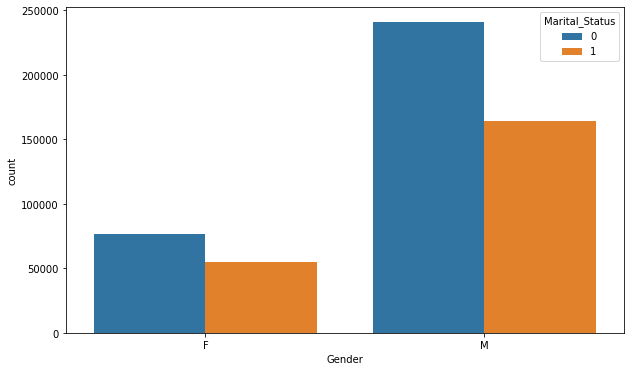

In [8]:
# Gender groups with marritial status
plt.figure(figsize=(10,6))
sns.countplot(df['Gender'], hue=df['Marital_Status'])

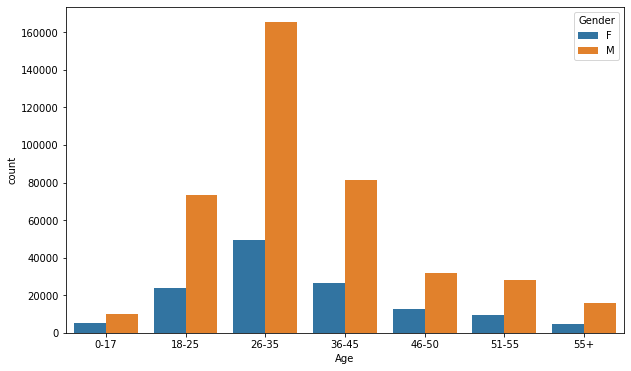

In [9]:
# Age groups with gender deployment
plt.figure(figsize=(10,6))
sns.countplot(df['Age'].sort_values(), hue=df['Gender'])

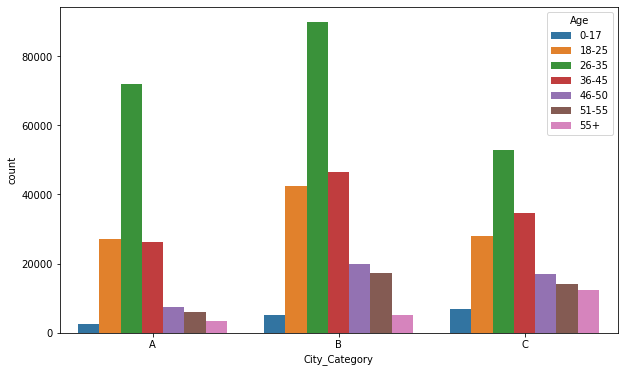

In [10]:
# City category with age deployment
plt.figure(figsize=(10,6))
sns.countplot(df['City_Category'].sort_values(), hue=df['Age'].sort_values())

In [11]:
df.dtypes

Gender                         object
Age                            object
Occupation                      int64
City_Category                  object
Stay_In_Current_City_Years     object
Marital_Status                  int64
Product_Category_1              int64
Product_Category_2            float64
Product_Category_3            float64
Purchase                        int64
dtype: object

In [12]:
# Taking care of categorical data
df.Age.replace({'0-17':0,
                '18-25':1, 
                '26-35':2,
                '36-45':3,
                '46-50':4,
                '51-55':5,
                '55+':6}, inplace = True)
df.City_Category.replace({'A':1,
                          'B':2,        
                          'C':3}, inplace = True)
df.Gender.replace({'M':1,        
                   'F':0}, inplace = True)
df.Stay_In_Current_City_Years.replace({'0':0,
                                       '1':1,        
                                       '2':2,        
                                       '3':3,        
                                       '4+':4}, inplace = True)

df.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,0,0,10,1,2,0,3,0.0,0.0,8370
1,0,0,10,1,2,0,1,6.0,14.0,15200
2,0,0,10,1,2,0,12,0.0,0.0,1422
3,0,0,10,1,2,0,12,14.0,0.0,1057
4,1,6,16,3,4,0,8,0.0,0.0,7969


In [13]:
# Creating DV and IV sets
X = df.drop('Purchase', axis=1)
y = df['Purchase']

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=123)

In [14]:
"""
We are goinig to test 4 models:
- Simple Linear Regression
- Decision Tree Regression
- Random Forest Regression
- Gradient Boosting Regression

For evaluation we have 4 metrics: Mean Square Error, R2, Mean accuracy (from k-Fold Cross Validation), Standard deviation (from k-Fold Cross Validation).
All metrics are to be stored in 'sum_met' data frame (summary of meterics).
"""

# Metrics of used Regression models
sum_met = pd.DataFrame(index = ["MSE_Error", "R2_Score", "Mean_accuracy", "Std_deviation"],
                       columns = ['Lin_Reg', 'Decision_Tree', 'Random_Forest', 'G_Boost'])

In [15]:
# Simple Linear Regression
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Predicting the Test set results
y_pred = regressor.predict(X_test)

# Finding the mean_squared error (MSE)
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)

# Finding the r2 score or the variance (R2)
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)

# Applying k-Fold Cross Validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = regressor, X = X_test, y = y_test, cv = 10)

# Printing metrics for Linear Regression
print("MSE Error:", np.sqrt(mse))
print("R2 Score:", r2)
print("Mean accuracy:", accuracies.mean())
print("Std deviation:", accuracies.std())

# Writing metrics to summary data frame
sum_met.at['MSE_Error','Lin_Reg'] = np.sqrt(mse)
sum_met.at['R2_Score','Lin_Reg'] = r2
sum_met.at['Mean_accuracy','Lin_Reg'] = accuracies.mean()
sum_met.at['Std_deviation','Lin_Reg'] = accuracies.std()

MSE Error: 4623.30262088952
R2 Score: 0.1357420120206947
Mean accuracy: 0.13550313530350752
Std deviation: 0.009358730966663403


In [16]:
# Decision Tree Regression
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state = 123)
regressor.fit(X_train, y_train)

# Predicting the Test set results
y_pred = regressor.predict(X_test)

# Finding the mean_squared error (MSE)
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)

# Finding the r2 score or the variance (R2)
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)

# Applying k-Fold Cross Validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = regressor, X = X_test, y = y_test, cv = 10)

# Printing metrics
print("MSE Error:", np.sqrt(mse))
print("R2 Score:", r2)
print("Mean accuracy:", accuracies.mean())
print("Std deviation:", accuracies.std())

# Writing metrics to summary data frame
sum_met.at['MSE_Error','Decision_Tree'] = np.sqrt(mse)
sum_met.at['R2_Score','Decision_Tree'] = r2
sum_met.at['Mean_accuracy','Decision_Tree'] = accuracies.mean()
sum_met.at['Std_deviation','Decision_Tree'] = accuracies.std()

MSE Error: 3350.1844885577257
R2 Score: 0.5461877587067794
Mean accuracy: 0.43182728941487103
Std deviation: 0.010559245904422511


In [17]:
# Random Forest Regression
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 300, random_state = 123) 
regressor.fit(X_train, y_train)

# Predicting the Test set results
y_pred = regressor.predict(X_test)

# Finding the mean_squared error (MSE)
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)

# Finding the r2 score or the variance (R2)
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)

# Applying k-Fold Cross Validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = regressor, X = X_test, y = y_test, cv = 10)

# Printing metrics
print("MSE Error:", np.sqrt(mse))
print("R2 Score:", r2)
print("Mean accuracy:", accuracies.mean())
print("Std deviation:", accuracies.std())

# Writing metrics to summary data frame
sum_met.at['MSE_Error','Random_Forest'] = np.sqrt(mse)
sum_met.at['R2_Score','Random_Forest'] = r2
sum_met.at['Mean_accuracy','Random_Forest'] = accuracies.mean()
sum_met.at['Std_deviation','Random_Forest'] = accuracies.std()

MSE Error: 3054.4315415825467
R2 Score: 0.622775795685553
Mean accuracy: 0.6008532211172776
Std deviation: 0.007297354686002605


In [18]:
# Gradient Boosting Regression
from sklearn.ensemble import GradientBoostingRegressor
regressor = GradientBoostingRegressor(n_estimators = 100, max_depth = 5, min_samples_split = 2, learning_rate = 0.1)
regressor.fit(X_train, y_train)

# Predicting the Test set results
y_pred = regressor.predict(X_test)

# Finding the mean_squared error (MSE)
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)

# Finding the r2 score or the variance (R2)
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)

# Applying k-Fold Cross Validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = regressor, X = X_test, y = y_test, cv = 10)

# Printing metrics
print("MSE Error:", np.sqrt(mse))
print("R2 Score:", r2)
print("Mean accuracy:", accuracies.mean())
print("Std deviation:", accuracies.std())

# Writing metrics to summary data frame
sum_met.at['MSE_Error','G_Boost'] = np.sqrt(mse)
sum_met.at['R2_Score','G_Boost'] = r2
sum_met.at['Mean_accuracy','G_Boost'] = accuracies.mean()
sum_met.at['Std_deviation','G_Boost'] = accuracies.std()

MSE Error: 2929.7699597177125
R2 Score: 0.6529390087431459
Mean accuracy: 0.6506215146180633
Std deviation: 0.005086269719038269


In [19]:
sum_met

,Lin_Reg,Decision_Tree,Random_Forest,G_Boost
MSE_Error,4623.3,3350.18,3054.43,2929.77
R2_Score,0.135742,0.546188,0.622776,0.652939
Mean_accuracy,0.135503,0.431827,0.600853,0.650622
Std_deviation,0.00935873,0.0105592,0.00729735,0.00508627


As we can see all 4 metrics show that Gradient Boosting Regression demonstrates the best performance.

Mean accuracy - 65%.
Standard deviation - 0.005.